In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We looked at histograms, pmf, and cdf charts to get an idea of the distribution of our data - or how it is spread out over the range. Are most values clustered together closely? Are values fairly evenly spread out? Are there patterns? Outliers? Clusters?

Everything we've dealt with thus far has been emperical - i.e. we've taken actual data, and looked at the shape of that data to see the (actual, real life) distribution. This inheirently depends on collecting some data, and looking at it - this real world aspect has some limitations, you need to have actual data collected.  

Now we're going to look at analytical distributions - mathmatical models that represent a distribution. Analytical distributions allow us to look at/analyze/calculate things without having to collect all that data - we can use the mathmatical formula as a siplified representation of what we would expect to find if we did collect the data.

In many cases the model can pretty accurately represent the real data, and we can use the simple model to do analysis and make predictions, having faith that the data will closely mirror our calculations.

The most common and well know example of this the the normal distribution or bell curve. We can use this model to analyze may distributions we see in real life - the heights, home prices, etc from the demonstrations tend to look a lot like bell curves, as do many things in real life. 

Our goal for this one is to get a model that models (part of) COVID growth!

In [4]:
#Load some Covid Data
#Note the sep thing - that tells Pandas that the separator is a semi-colon. This is just weird data.
#In theory, the separator could be anything (it is usually a comma), just use this if it is
df = pd.read_csv("full_data_2.csv", sep=";")
df.tail(10)

,Time,Infections
44,07/03/2020,213
45,08/03/2020,213
46,09/03/2020,213
47,10/03/2020,472
48,11/03/2020,696
49,12/03/2020,987
50,13/03/2020,1264
51,14/03/2020,1678
52,15/03/2020,1678
53,16/03/2020,1678


In [5]:
#I'm going to add a "Day Number" value. This just makes it easier than using dates.
#Note: you could write a function to translate days to dates...
#The command to do this is just a Google result "dataframe add running number". I add 1 to avoid a log(0) scenario. 
df["Day"] = np.arange(len(df))
df["Day"] = df["Day"].apply(lambda x: x+ 1)
df.drop([52,53], inplace=True)
df.tail()

,Time,Infections,Day
47,10/03/2020,472,48
48,11/03/2020,696,49
49,12/03/2020,987,50
50,13/03/2020,1264,51
51,14/03/2020,1678,52


Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

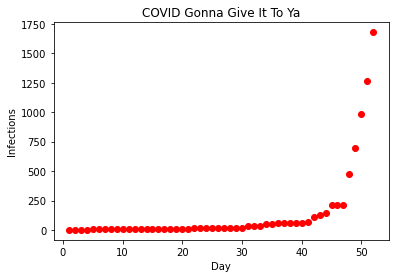

In [6]:
#Look at the growth!
#Note: I'm using something called pyplot to make this. Pyplot is what the thinkplot functions use.
#I'm doing this because I want a simple line. See imports for the added line above. 
plt.plot(df["Day"], df["Infections"], "or")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')

Text(0.5, 1.0, 'COVID Gonna Give It To Ya')

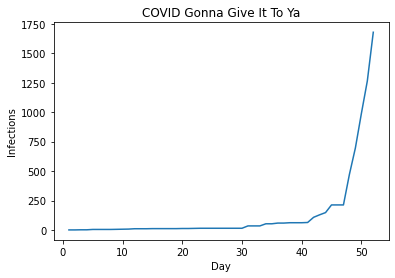

In [7]:
#As a line
plt.plot(df["Day"], df["Infections"])
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')

Looks pretty exponential! 

What if we were to make the y axis into a logarithmic scale. Why?

The original formula is y = s * b^x
y = # infections
s = initial number of people infected
b = infections generated per infected person. (Growth Rate)
x = days in

Taking the log of both sides and looking at in on that scale looks a little different....
y = log(s) + log(b) * x
Note: the y stays y, and not log(y) when we graph it, because of that log scale.

This is now a linerar function!
y=mx+b

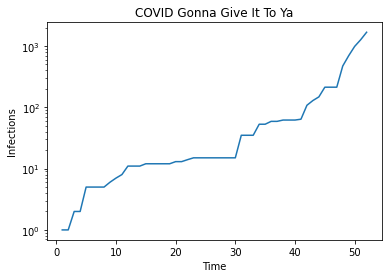

In [8]:
plt.plot(df["Day"], df["Infections"])
plt.xlabel('Time')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')
plt.yscale('log')

Now the line is kind of straight. The more straight it is, the "better". 

The closer this curve is to a line, the closer the real data is to exponential. Why?

In [9]:
#Generate best fit line
#You don't need to memorize this, we'll do this stuff later when we do scatter plots and regression. 
y = np.log(df["Infections"])
x = df["Day"]
m,b=np.polyfit(x, y, 1, w=np.sqrt(y))
y_fit=np.exp(m*x+b)
print(m)
print(b)


0.11748262946936423
0.18488346106582387


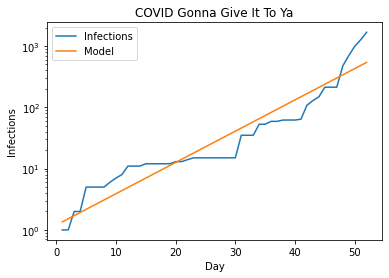

In [10]:
#Show best fit line on graph.
plt.plot(df["Day"], df["Infections"], label="Infections")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')
plt.yscale('log')
plt.plot(x, y_fit, label="Model")
plt.legend()

What does all this mean? These general points are important! 

One of the uses of analytical models is to give us a simplied model that we can use to examine real data. 
The closer the data is to the model, the better it "fits". 
Things like the log scale for exponential functions give us a way to look for fit. There's visual and analytical methods. 

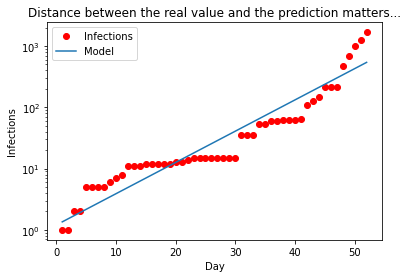

In [11]:
#Show best fit line on graph.
plt.plot(df["Day"], df["Infections"], "or", label="Infections")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('Distance between the real value and the prediction matters...')
plt.yscale('log')
plt.plot(x, y_fit, label="Model")
plt.legend()

We can "undo" the log part to see our new predictions!
They aren't awesome, but we just started. 

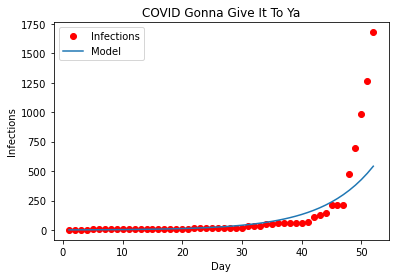

In [12]:
plt.plot(df["Day"], df["Infections"], "or", label="Infections")
plt.xlabel('Day')
plt.ylabel('Infections')
plt.title('COVID Gonna Give It To Ya')
plt.plot(x,y_fit, label="Model")
plt.legend()